In [ ]:
"""# Run only once
!pip uninstall -y numpy gensim
!pip install --force-reinstall numpy gensim"""

'# Run only once\n!pip uninstall -y numpy gensim\n!pip install --force-reinstall numpy gensim'

In [ ]:
# installing libraries like gensim for LDA modelling
#!pip install --force-reinstall numpy==1.26.0
#!pip install --force-reinstall gensim pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load data set
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/BPA/for_export_deepseek.csv')

In [ ]:
# Mapping column names to snacke case naming convention
column_name_mapping = { 'pseudo_id': 'tweet_id', 'text': 'tweet_text', 'retweetCount': 'retweet_count', 'replyCount': 'reply_count', 'likeCount': 'like_count', 'quoteCount': 'quote_count', 'viewCount': 'view_count', 'bookmarkCount': 'bookmark_count', 'createdAt': 'created_at', 'lang': 'language', 'isReply': 'is_reply', 'pseudo_inReplyToId': 'in_reply_to_tweet_id', 'pseudo_conversationId': 'conversation_id', 'pseudo_inReplyToUserId': 'in_reply_to_user_id', 'pseudo_author_id': 'author_id', 'author_location': 'author_location', 'author_followers': 'author_followers_count', 'author_following': 'author_following_count', 'author_isVerified': 'author_is_verified', 'author_isBlueVerified': 'author_is_blue_verified' }
df = df.rename(columns=column_name_mapping)


In [ ]:
# identifying language name inconsitencies and mapping language codes to languages and then replacing the language codes with languages
language_mapping = {
    'en': 'English', 'ja': 'Japanese', 'uk': 'Ukrainian', 'nl': 'Dutch', 'hi': 'Hindi', 'it': 'Italian', 'es': 'Spanish',
    'in': 'Indonesian', 'de': 'German', 'tr': 'Turkish', 'ca': 'Catalan', 'zh': 'Chinese', 'fr': 'French', 'ko': 'Korean',
    'th': 'Thai', 'und': 'artificial_undetermined_language', 'gu': 'Gujarati', 'lt': 'Lithuanian', 'ru': 'Russian',
    'fa': 'Persian', 'ro': 'Romanian', 'cs': 'Czech', 'ar': 'Arabic', 'pt': 'Portuguese', 'tl': 'Filipino', 'mr': 'Marathi',
    'fi': 'Finnish', 'et': 'Estonian', 'ur': 'Urdu', 'hu': 'Hungarian', 'pl': 'Polish', 'ta': 'Tamil', 'sv': 'Swedish',
    'te': 'Telugu', 'ml': 'Malayalam', 'bn': 'Bengali', 'ht': 'Haitian Creole', 'el': 'Greek', 'cy': 'Welsh',
    'vi': 'Vietnamese', 'ne': 'Nepali', 'kn': 'Kannada', 'lv': 'Latvian', 'bg': 'Bulgarian', 'eu': 'Basque',
    'sl': 'Slovenian', 'no': 'Norwegian', 'iw': 'Hebrew', 'da': 'Danish', 'si': 'Sinhala', 'is': 'Icelandic',
    'ps': 'Pashto', 'my': 'Burmese', 'pa': 'Punjabi', 'ckb': 'Sorani Kurdish', 'sr': 'Serbian', 'am': 'Amharic',
    'hy': 'Armenian', 'or': 'Odia', 'sd': 'Sindhi', 'lo': 'Lao', 'ka': 'Georgian', 'dv': 'Dhivehi',
    'zxx': 'artificial_media', 'qam': 'artificial_mentions', 'qme': 'artificial_media links', 'qht': 'artificial_hashtags',
    'qct': 'artificial_cash_tags', 'qst': 'artificial_very_short_text'
}
df['language'] = df['language'].map(language_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364295 entries, 0 to 364294
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   tweet_id                 364295 non-null  uint64
 1   tweet_text               364295 non-null  object
 2   retweet_count            364295 non-null  int64 
 3   reply_count              364295 non-null  int64 
 4   like_count               364295 non-null  int64 
 5   quote_count              364295 non-null  int64 
 6   view_count               364295 non-null  int64 
 7   bookmark_count           364295 non-null  int64 
 8   created_at               364295 non-null  object
 9   language                 364295 non-null  object
 10  is_reply                 364295 non-null  bool  
 11  in_reply_to_tweet_id     364295 non-null  object
 12  conversation_id          364295 non-null  uint64
 13  in_reply_to_user_id      364295 non-null  object
 14  author_id           

In [ ]:
# Mapping column names to snacke case naming convention
column_name_mapping = {'pseudo_id': 'tweet_id', 'text': 'tweet_text', 'retweetCount': 'retweet_count', 'replyCount': 'reply_count', 'likeCount': 'like_count', 'quoteCount': 'quote_count', 'viewCount': 'view_count', 'bookmarkCount': 'bookmark_count', 'createdAt': 'created_at', 'lang': 'language', 'isReply': 'is_reply', 'pseudo_inReplyToId': 'in_reply_to_tweet_id', 'pseudo_conversationId': 'conversation_id', 'pseudo_inReplyToUserId': 'in_reply_to_user_id', 'pseudo_author_id': 'author_id', 'author_location': 'author_location', 'author_followers': 'author_followers_count', 'author_following': 'author_following_count', 'author_isVerified': 'author_is_verified', 'author_isBlueVerified': 'author_is_blue_verified'}
df = df.rename(columns=column_name_mapping)

In [ ]:
# Create a new data frame for english language tweets
english_df = df[df['language'] == 'English']

In [ ]:
# Replace the missing author location values with 'unknown'
english_df.loc[:, 'author_location'] = english_df['author_location'].fillna('Unknown')

# LDA day 1 and 2

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from gensim import corpora
from gensim.models import LdaModel

# Download required NLTK data (run once)
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


# Step 1: Sample the data (e.g., 20% of the dataset)
sample_fraction = 0.2  # Change this value to adjust the percentage (e.g., 0.1 for 10%, 0.5 for 50%)
sampled_df = english_df.sample(frac=sample_fraction, random_state=42)  # random_state for reproducibility
print(f"Sampled {len(sampled_df)} rows ({sample_fraction * 100}%) from original {len(df)} rows.")

# Step 2: Preprocess the tweet_text column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Apply preprocessing to tweet_text in the sampled data
sampled_df['processed_text'] = sampled_df['tweet_text'].apply(preprocess_text)

# Step 3: Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(sampled_df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in sampled_df['processed_text']]

# Step 4: Run LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)

# Step 5: Print the topics
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

# Optional: Assign dominant topics to each tweet in the sample
def get_dominant_topic(doc):
    bow = dictionary.doc2bow(doc)
    topics = lda_model[bow]
    return max(topics, key=lambda x: x[1])[0]  # Return the topic with highest probability

sampled_df['dominant_topic'] = sampled_df['processed_text'].apply(get_dominant_topic)

# View the results
print("\nSample of tweets with their dominant topics:")
print(sampled_df[['tweet_text', 'dominant_topic']].head())

# Optional: Save the sampled results to a CSV
sampled_df.to_csv('lda_sampled_results.csv', index=False)
print(f"Results saved to 'lda_sampled_results.csv'.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Sampled 41010 rows (20.0%) from original 364295 rows.
Topic 1: 0.022*"deepseek" + 0.015*"openai" + 0.013*"like" + 0.012*"model" + 0.011*"llm" + 0.011*"chatgpt" + 0.007*"dont" + 0.007*"need" + 0.007*"open" + 0.007*"one"
Topic 2: 0.056*"nvidia" + 0.036*"deepseek" + 0.028*"market" + 0.020*"stock" + 0.019*"chinese" + 0.015*"tech" + 0.014*"china" + 0.014*"chip" + 0.010*"billion" + 0.009*"company"
Topic 3: 0.057*"gpu" + 0.010*"power" + 0.007*"decentralized" + 0.007*"agent" + 0.007*"gpus" + 0.006*"new" + 0.006*"compute" + 0.006*"token" + 0.005*"nvidia" + 0.005*"cloud"
Topic 4: 0.025*"chatgpt" + 0.014*"deep" + 0.010*"seek" + 0.009*"llm" + 0.009*"job" + 0.007*"shit" + 0.006*"tried" + 0.006*"bought" + 0.006*"lose" + 0.005*"llama"
Topic 5: 0.018*"model" + 0.017*"deepseek" + 0.009*"openai" + 0.008*"deepseeks" + 0.007*"chatgpt" + 0.007*"like" + 0.007*"innovation" + 0.007*"opensource" + 0.006*"development" + 0.006*"data"

Sample of tweets with their dominant topics:
                                 

<ipython-input-12-7681f9431db8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_labels, y=topic_counts.values, palette="viridis")


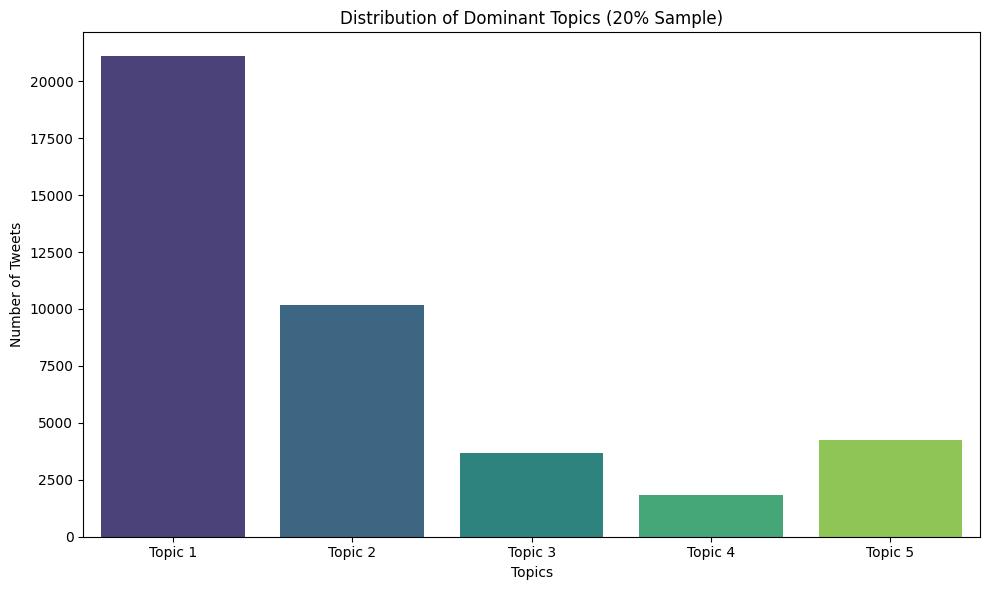

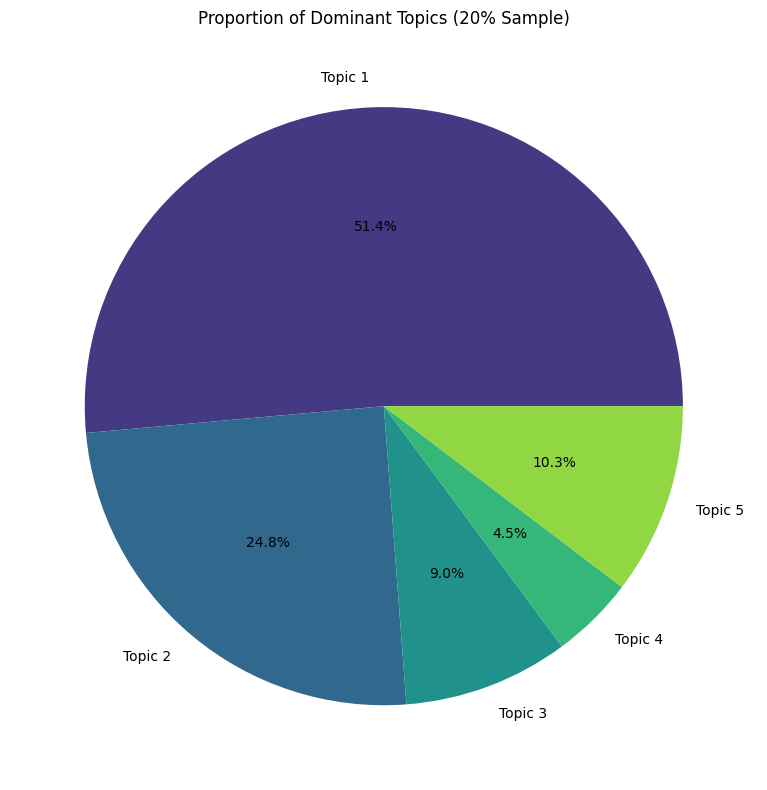


Topic Distribution Counts:
dominant_topic
0    21091
1    10160
2     3671
3     1846
4     4242
Name: count, dtype: int64

Topic Distribution Percentages:
dominant_topic
0    51.43
1    24.77
2     8.95
3     4.50
4    10.34
Name: count, dtype: float64


In [ ]:

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sampled_df is already created with 'dominant_topic' column from your LDA results

# Calculate the distribution of topics
topic_counts = sampled_df['dominant_topic'].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in range(len(topic_counts))]  # e.g., Topic 1, Topic 2, etc.

# --- Option 1: Bar Chart ---
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_labels, y=topic_counts.values, palette="viridis")
plt.title(f"Distribution of Dominant Topics ({int(sample_fraction*100)}% Sample)")
plt.xlabel("Topics")
plt.ylabel("Number of Tweets")
plt.xticks(rotation= 0)
plt.tight_layout()
plt.show()

# --- Option 2: Pie Chart ---
plt.figure(figsize=(8, 8))
plt.pie(topic_counts.values, labels=topic_labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(topic_counts)))
plt.title(f"Proportion of Dominant Topics ({int(sample_fraction*100)}% Sample)")
plt.xticks(rotation=180)
plt.tight_layout()
plt.show()

# Optional: Print the counts and percentages for reference
print("\nTopic Distribution Counts:")
print(topic_counts)
print("\nTopic Distribution Percentages:")
print((topic_counts / topic_counts.sum() * 100).round(2))

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from gensim import corpora
from gensim.models import LdaModel

# Step 1: Sample the data (e.g., 20% of the dataset)
sample_fraction = 0.8  # Change this value to adjust the percentage (e.g., 0.1 for 10%, 0.5 for 50%)
sampled_df = english_df.sample(frac=sample_fraction, random_state=42)  # random_state for reproducibility
print(f"Sampled {len(sampled_df)} rows ({sample_fraction * 100}%) from original {len(df)} rows.")

# Step 2: Preprocess the tweet_text column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Apply preprocessing to tweet_text in the sampled data
sampled_df['processed_text'] = sampled_df['tweet_text'].apply(preprocess_text)

# Step 3: Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(sampled_df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in sampled_df['processed_text']]

# Step 4: Run LDA model
num_topics = 5  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)

# Step 5: Print the topics
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

# Optional: Assign dominant topics to each tweet in the sample
def get_dominant_topic(doc):
    bow = dictionary.doc2bow(doc)
    topics = lda_model[bow]
    return max(topics, key=lambda x: x[1])[0]  # Return the topic with highest probability

sampled_df['dominant_topic'] = sampled_df['processed_text'].apply(get_dominant_topic)

# View the results
print("\nSample of tweets with their dominant topics:")
print(sampled_df[['tweet_text', 'dominant_topic']].head())

# Optional: Save the sampled results to a CSV
sampled_df.to_csv('lda_sampled_results.csv', index=False)
print(f"Results saved to 'lda_sampled_results.csv'.")

Sampled 164039 rows (80.0%) from original 364295 rows.
Topic 1: 0.016*"deepseek" + 0.015*"like" + 0.013*"llm" + 0.010*"chatgpt" + 0.009*"gpu" + 0.009*"sam" + 0.008*"altman" + 0.008*"one" + 0.008*"openai" + 0.006*"dont"
Topic 2: 0.026*"model" + 0.024*"deepseek" + 0.023*"nvidia" + 0.014*"openai" + 0.012*"gpus" + 0.012*"chip" + 0.012*"open" + 0.011*"need" + 0.011*"cost" + 0.009*"source"
Topic 3: 0.021*"gpu" + 0.008*"innovation" + 0.008*"model" + 0.007*"power" + 0.006*"new" + 0.006*"future" + 0.005*"infrastructure" + 0.005*"agent" + 0.005*"token" + 0.005*"project"
Topic 4: 0.045*"nvidia" + 0.033*"market" + 0.033*"deepseek" + 0.027*"stock" + 0.022*"tech" + 0.018*"chinese" + 0.011*"startup" + 0.010*"china" + 0.009*"billion" + 0.008*"nvda"
Topic 5: 0.044*"deepseek" + 0.042*"chatgpt" + 0.030*"chinese" + 0.024*"china" + 0.019*"openai" + 0.014*"app" + 0.009*"deep" + 0.008*"data" + 0.008*"seek" + 0.007*"india"

Sample of tweets with their dominant topics:
                                         

<ipython-input-22-4909e8b5b991>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_labels, y=topic_counts.values, palette="viridis")


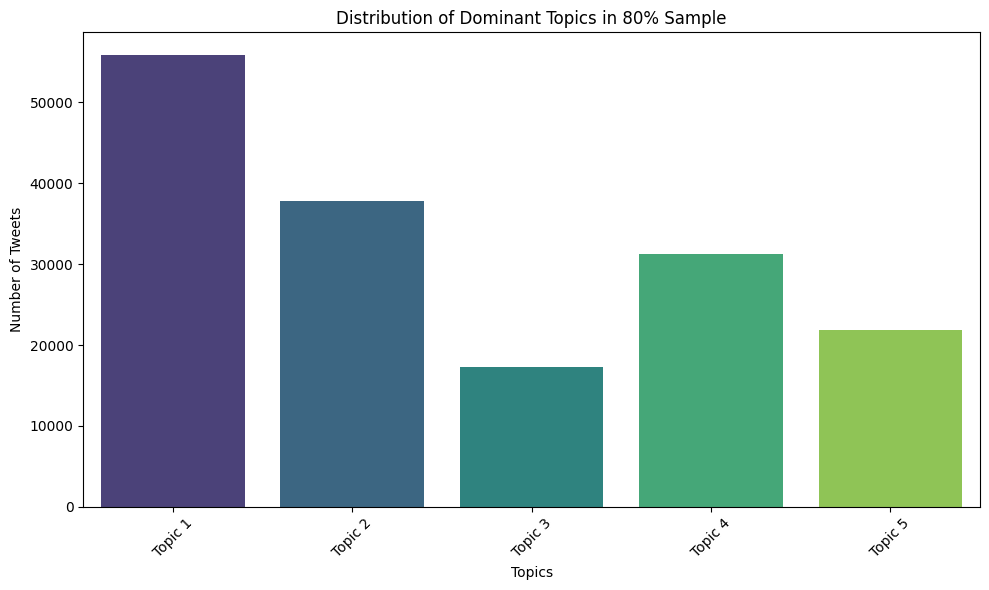

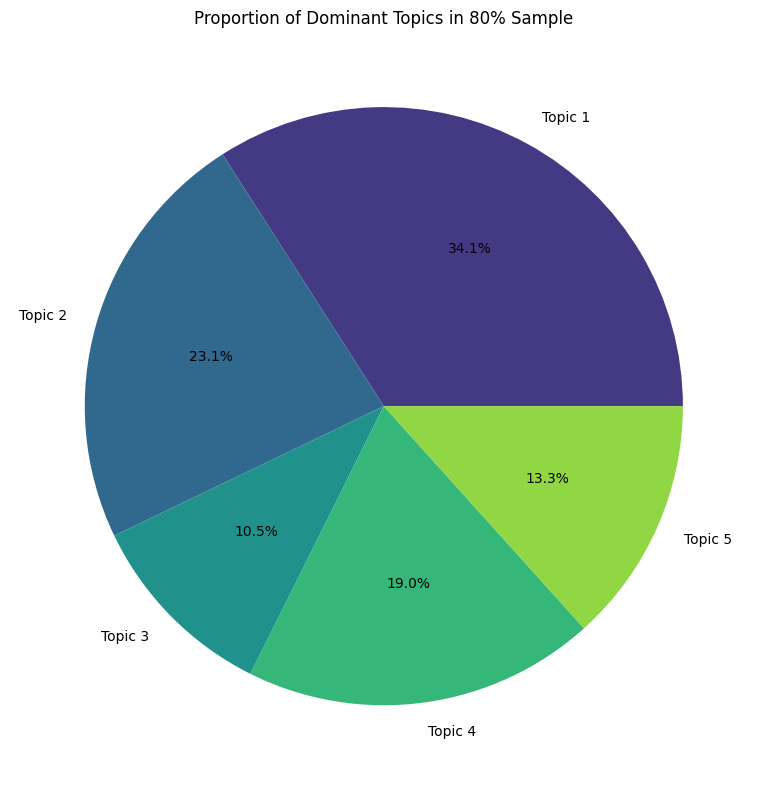


Topic Distribution Counts:
dominant_topic
0    55882
1    37830
2    17245
3    31219
4    21863
Name: count, dtype: int64

Topic Distribution Percentages:
dominant_topic
0    34.07
1    23.06
2    10.51
3    19.03
4    13.33
Name: count, dtype: float64


In [ ]:
# Calculate the distribution of dominant topics
topic_counts = sampled_df['dominant_topic'].value_counts().sort_index()
topic_labels = [f"Topic {i+1}" for i in range(len(topic_counts))]  # e.g., Topic 1, Topic 2, etc.

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_labels, y=topic_counts.values, palette="viridis")
plt.title(f"Distribution of Dominant Topics in {int(sample_fraction*100)}% Sample")
plt.xlabel("Topics")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(topic_counts.values, labels=topic_labels, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(topic_counts)))
plt.title(f"Proportion of Dominant Topics in {int(sample_fraction*100)}% Sample")
plt.tight_layout()
plt.show()

# Print counts and percentages
print("\nTopic Distribution Counts:")
print(topic_counts)
print("\nTopic Distribution Percentages:")
print((topic_counts / topic_counts.sum() * 100).round(2))

TypeError: text() got multiple values for argument 'x'

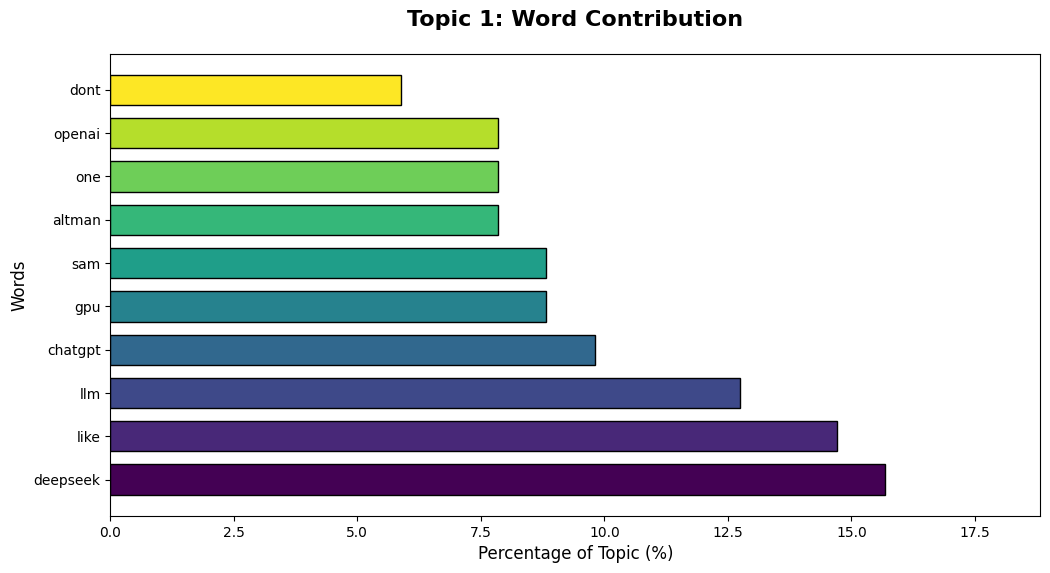

In [ ]:
import numpy as np
# Visualize Topics with Word Percentages Beautifully

# Extract topics and compute percentages
topic_data = []
for idx, topic in lda_model.print_topics(num_words=10):
    # Parse the topic string into words and weights (e.g., '0.022*"deepseek" + 0.015*"openai"')
    terms = topic.split(" + ")
    words = [term.split("*")[1].strip('"') for term in terms]  # Extract words
    weights = [float(term.split("*")[0]) for term in terms]   # Extract weights
    total_weight = sum(weights)
    percentages = [w / total_weight * 100 for w in weights]   # Convert to percentages
    topic_data.append((f"Topic {idx + 1}", words, percentages))

# Create a beautiful visualization for each topic
for topic_name, words, percentages in topic_data:
    plt.figure(figsize=(12, 6))

    # Horizontal bar chart
    colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Gradient color scheme
    bars = plt.barh(words, percentages, color=colors, edgecolor='black', height=0.7)

    # Customize the plot
    plt.title(f"{topic_name}: Word Contribution", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Percentage of Topic (%)", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.xlim(0, max(percentages) * 1.2)  # Add some padding to x-axis

    # Add percentage labels on the bars
    for bar, percentage in zip(bars, percentages):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
                 ha='left', va='center', fontsize=10, color='black', x=width + 0.5)

    # Aesthetic tweaks
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print a summary table for this topic
    print(f"\n{topic_name} Word Percentages:")
    for word, perc in zip(words, percentages):
        print(f"{word:<15} {perc:>5.1f}%")

# Optional: Save all figures to a PDF (uncomment if desired)
# from matplotlib.backends.backend_pdf import PdfPages
# with PdfPages('lda_topics_visualization.pdf') as pdf:
#     for topic_name, words, percentages in topic_data:
#         plt.figure(figsize=(12, 6))
#         colors = plt.cm.viridis(np.linspace(0, 1, len(words)))
#         bars = plt.barh(words, percentages, color=colors, edgecolor='black', height=0.7)
#         plt.title(f"{topic_name}: Word Contribution", fontsize=16, fontweight='bold', pad=20)
#         plt.xlabel("Percentage of Topic (%)", fontsize=12)
#         plt.ylabel("Words", fontsize=12)
#         plt.xlim(0, max(percentages) * 1.2)
#         for bar, percentage in zip(bars, percentages):
#             width = bar.get_width()
#             plt.text(width, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
#                      ha='left', va='center', fontsize=10, color='black', x=width + 0.5)
#         plt.grid(axis='x', linestyle='--', alpha=0.7)
#         plt.tight_layout()
#         pdf.savefig()
#         plt.close()
# print("All topic visualizations saved to 'lda_topics_visualization.pdf'.")

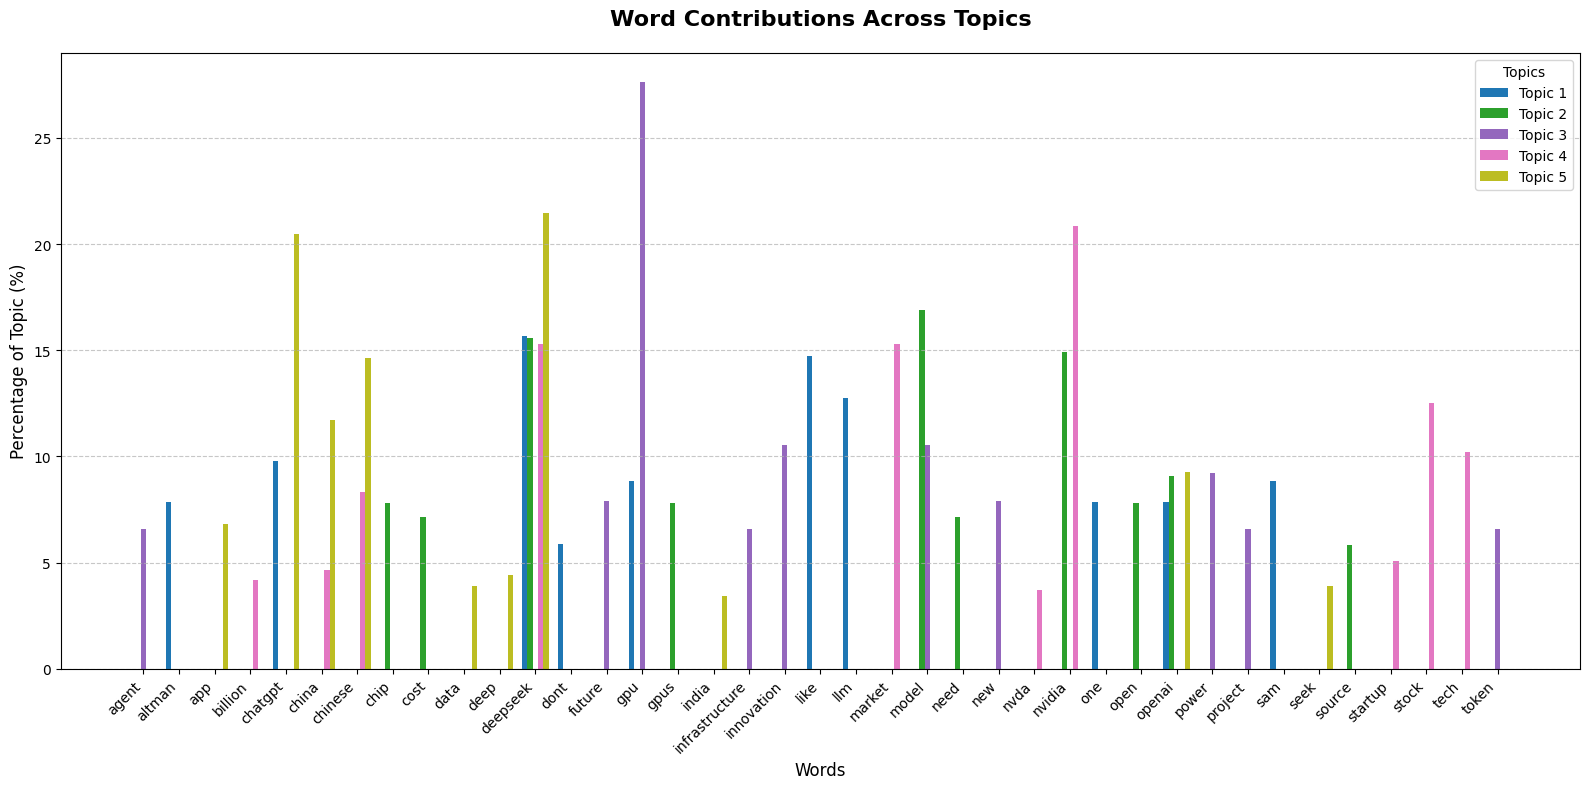


Word Percentages Across Topics:
Word           Topic 1        Topic 2        Topic 3        Topic 4        Topic 5        
agent            0.0%           0.0%           6.6%           0.0%           0.0%         
altman           7.8%           0.0%           0.0%           0.0%           0.0%         
app              0.0%           0.0%           0.0%           0.0%           6.8%         
billion          0.0%           0.0%           0.0%           4.2%           0.0%         
chatgpt          9.8%           0.0%           0.0%           0.0%          20.5%         
china            0.0%           0.0%           0.0%           4.6%          11.7%         
chinese          0.0%           0.0%           0.0%           8.3%          14.6%         
chip             0.0%           7.8%           0.0%           0.0%           0.0%         
cost             0.0%           7.1%           0.0%           0.0%           0.0%         
data             0.0%           0.0%           0.0%      

In [ ]:
topic_data = []
all_words = set()  # To collect all unique words across topics
for idx, topic in lda_model.print_topics(num_words=10):
    terms = topic.split(" + ")
    words = [term.split("*")[1].strip('"') for term in terms]
    weights = [float(term.split("*")[0]) for term in terms]
    total_weight = sum(weights)
    percentages = [w / total_weight * 100 for w in weights]
    topic_data.append((f"Topic {idx + 1}", words, percentages))
    all_words.update(words)  # Add words to the set

# Convert set to sorted list for consistent ordering
all_words = sorted(list(all_words))

# Prepare data for grouped bar chart
num_topics = len(topic_data)
word_percentages = {word: [0] * num_topics for word in all_words}  # Initialize with zeros
for topic_idx, (_, words, percentages) in enumerate(topic_data):
    for word, perc in zip(words, percentages):
        word_percentages[word][topic_idx] = perc

# Plotting
plt.figure(figsize=(16, 8))
bar_width = 0.15  # Width of each bar
x = np.arange(len(all_words))  # Positions for the words on x-axis

# Plot bars for each topic
for topic_idx in range(num_topics):
    topic_name = topic_data[topic_idx][0]
    percentages = [word_percentages[word][topic_idx] for word in all_words]
    plt.bar(x + topic_idx * bar_width, percentages, bar_width, label=topic_name,
            color=plt.cm.tab10(topic_idx / num_topics))  # Different color per topic

# Customize the plot
plt.title("Word Contributions Across Topics", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Percentage of Topic (%)", fontsize=12)
plt.xticks(x + bar_width * (num_topics - 1) / 2, all_words, rotation=45, ha='right')
plt.legend(title="Topics", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Print a summary table for reference
print("\nWord Percentages Across Topics:")
print(f"{'Word':<15}", end="")
for topic_name, _, _ in topic_data:
    print(f"{topic_name:<15}", end="")
print()
for word in all_words:
    print(f"{word:<15}", end="")
    for topic_idx in range(num_topics):
        perc = word_percentages[word][topic_idx]
        print(f"{perc:>5.1f}%{'':<9}", end="")
    print()

In [ ]:

# Extract topics and compute percentages
topic_data = []
for idx, topic in lda_model.print_topics(num_words=10):
    terms = topic.split(" + ")
    words = [term.split("*")[1].strip('"') for term in terms]
    weights = [float(term.split("*")[0]) for term in terms]
    total_weight = sum(weights)
    percentages = [w / total_weight * 100 for w in weights]  # Normalize to percentages within the topic
    topic_data.append((f"Topic {idx + 1}", words, percentages))

# Create a subplot for each topic
num_topics = len(topic_data)
fig, axes = plt.subplots(num_topics, 1, figsize=(12, num_topics * 4), sharex=True)

# If there's only one topic, wrap axes in a list for iteration
if num_topics == 1:
    axes = [axes]

# Plot each topic in its own subplot
for ax, (topic_name, words, percentages) in zip(axes, topic_data):
    # Horizontal bar chart for this topic
    colors = plt.cm.viridis(np.linspace(0, 1, len(words)))  # Gradient color scheme
    bars = ax.barh(words, percentages, color=colors, edgecolor='black', height=0.7)

    # Customize the subplot
    ax.set_title(f"{topic_name}: Word Contribution", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlim(0, max(percentages) * 1.2)  # Add padding to x-axis
    ax.set_ylabel("Words", fontsize=12)

    # Add percentage labels on the bars
    for bar, percentage in zip(bars, percentages):
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
                ha='left', va='center', fontsize=10, color='black')

    # Aesthetic tweaks
    ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add a shared x-label
fig.supxlabel("Percentage of Topic (%)", fontsize=12, y=-0.02)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Print a summary table for each topic
print("\nWord Percentages by Topic:")
for topic_name, words, percentages in topic_data:
    print(f"\n{topic_name}:")
    for word, perc in zip(words, percentages):
        print(f"{word:<15} {perc:>5.1f}%")

NameError: name 'lda_model' is not defined

# LDA DAAY 3 - TOPIC MODELLING AND LDA WITH REDUCED TOPICS TO SEE IF WE CAN SEE IF THERE IS A RELATIONSHIP BETWEEN FIRST DOMINANT TOPIC AND THE SECOND DOMINANT ONE - 3/29/2025


In [ ]:
# Sample the data (e.g., 20% of the dataset)
sample_fraction = 0.1  # Change this value to adjust the percentage (e.g., 0.1 for 10%, 0.5 for 50%)
sampled_df = english_df.sample(frac=sample_fraction, random_state=42)  # random_state for reproducibility
print(f"Sampled {len(sampled_df)} rows ({sample_fraction * 100}%) from english tweets that are a total of {len(english_df)} rows.")

Sampled 20505 rows (10.0%) from english tweets that has a total of 205049 rows.


In [ ]:
# Define parameter grid for LDA LdaMulticore()

param_grid = {
    'num_topics': [3, 7]
}

# ===========================================
# LDA MODEL TRAINING PARAMETERS
# ===========================================

# corpus: {iterable of list of (int, float), scipy.sparse.csc}, optional
#   Stream of document vectors or sparse matrix of shape (num_documents, num_terms).
#   If not given, the model is left untrained, and you may want to call the model's update method manually.

# num_topics: int, optional
#   The number of requested latent topics to be extracted from the training corpus.

# id2word: {dict of (int, str), gensim.corpora.dictionary.Dictionary}
#   Mapping from word IDs to words. This is used to determine the vocabulary size and for debugging and topic printing.

# workers: int, optional
#   The number of worker processes to be used for parallelization. If None, all available cores are used.
#   For optimal performance, set workers to the number of your real cores (not hyper-threads) minus one.

# chunksize: int, optional
#   The number of documents to be used in each training chunk. This helps with memory efficiency and training speed.

# passes: int, optional
#   The number of passes through the corpus during training. More passes typically improve topic coherence.

# alpha: {float, numpy.ndarray of float, list of float, str}, optional
#   A-priori belief on document-topic distribution:
#     * Scalar for a symmetric prior over document-topic distribution.
#     * 1D array for an asymmetric user-defined prior for each topic.
#     * 'symmetric': (default) Fixed symmetric prior of 1.0 / num_topics.
#     * 'asymmetric': Fixed normalized asymmetric prior of 1.0 / (topic_index + sqrt(num_topics)).

# eta: {float, numpy.ndarray of float, list of float, str}, optional
#   A-priori belief on topic-word distribution:
#     * Scalar for a symmetric prior over topic-word distribution.
#     * 1D array for an asymmetric user-defined prior for each word.
#     * Matrix (num_topics, num_words) for probability for each word-topic combination.
#     * 'symmetric': (default) Fixed symmetric prior of 1.0 / num_topics.
#     * 'auto': Learns an asymmetric prior from the corpus.

# decay: float, optional
#   A value between (0.5, 1] to weight what percentage of the previous lambda value is forgotten
#   when each new document is examined. Corresponds to \kappa from 'Online Learning for LDA'.

# offset: float, optional
#   Hyper-parameter controlling how much the first few iterations are slowed down.
#   Corresponds to \tau_0 from 'Online Learning for LDA'.

# eval_every: int, optional
#   Log perplexity is estimated every this many updates. Setting this to 1 slows down training by ~2x.

# iterations: int, optional
#   Maximum number of iterations through the corpus when inferring the topic distribution of a corpus.

# gamma_threshold: float, optional
#   Minimum change in the value of the gamma parameters to continue iterating.

# minimum_probability: float, optional
#   Topics with a probability lower than this threshold will be filtered out.

# random_state: {np.random.RandomState, int}, optional
#   Either a randomState object or a seed to generate one. Useful for reproducibility.
#   Note: Results can still vary due to non-determinism in OS scheduling of worker processes.

# minimum_phi_value: float, optional
#   If per_word_topics is True, this represents a lower bound on the term probabilities.

# per_word_topics: bool, optional
#   If True, the model also computes a list of topics, sorted in descending order of most likely topics for each word,
#   along with their phi values multiplied by the feature length (i.e., word count).

# dtype: {numpy.float16, numpy.float32, numpy.float64}, optional
#   Data-type to use during calculations inside the model. All inputs are also converted to this data type.

In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from gensim import corpora
from gensim.models import LdaModel
from sklearn.model_selection import ParameterGrid
from gensim.models import CoherenceModel
from gensim.models import LdaMulticore
from gensim import corpora
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Defining preprocessing and evaluation metrics
# Preprocess the tweet_text column
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

# Function to compute coherence score
def compute_coherence_score(lda_model, corps, dictionary):
    coherence_model_lda = CoherenceModel(model=lda_model, texts=sampled_df['processed_text'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

# Function to calculate topic diversity
def calculate_topic_diversity(lda_model, num_topics):
    topic_words = [lda_model.show_topic(i, topn=10) for i in range(num_topics)]
    topic_words_flat = [word for topic in topic_words for word, _ in topic]
    topic_words_set = set(topic_words_flat)
    topic_diversity = len(topic_words_set) / len(topic_words_flat)  # Ratio of unique words to total words
    return topic_diversity

# Function to evaluate model stability
def evaluate_topic_stability(lda_model, corpus, dictionary, num_runs=5):
    topic_distributions = []
    for _ in range(num_runs):
        # Re-train the model with different random states each time
        lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=lda_model.num_topics,
                                 passes=lda_model.passes, workers=8, random_state=np.random.randint(1000))
        topic_distributions.append([lda_model.get_topic_terms(i, topn=10) for i in range(lda_model.num_topics)])

    # Compare topic distributions across multiple runs for stability
    stable_topics = []
    for i in range(lda_model.num_topics):
        # Find the most common top words across multiple runs
        top_words = [topic[i][0] for topic in topic_distributions]
        common_words = set(top_words)
        stability_score = len(common_words) / len(top_words)  # Proportion of common words
        stable_topics.append(stability_score)

    return np.mean(stable_topics)  # Average stability score

In [ ]:
# Preprocess the 'tweet_text' column
sampled_df['processed_text'] = sampled_df['tweet_text'].apply(preprocess_text)

# Create a dictionary from the processed texts (this should work fine)
dictionary = corpora.Dictionary(sampled_df['processed_text'])

# Create the corpus (bag-of-words format)
corpus = [dictionary.doc2bow(text) for text in sampled_df['processed_text']]

## Hyper parameter tuning

In [ ]:
# Create ParameterGrid object
grid = ParameterGrid(param_grid)

# Initialize results list
results = []

# Loop through parameter combinations
for params in grid:
    # Train LDA model
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary,
                             num_topics=params['num_topics'], passes=20, workers=8)

    # Evaluate model
    coherence_score = compute_coherence_score(lda_model, corpus, dictionary)  # Coherence score
    topic_diversity = calculate_topic_diversity(lda_model, params['num_topics'])  # Topic diversity
    stability_score = evaluate_topic_stability(lda_model, corpus, dictionary)  # Stability score

    # Store results
    results.append({
        **params,
        'coherence_score': coherence_score,
        'topic_diversity': topic_diversity,
        'stability_score': stability_score
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Analyze results
print(results_df)  # You can visualize or further analyze the results

# Optional: Export the results to a CSV file
results_df.to_csv('lda_model_evaluation_results.csv', index=False)
print("Results saved to 'lda_model_evaluation_results.csv'.")

   num_topics  coherence_score  topic_diversity  stability_score
0           3         0.484961         0.700000              1.0
1           7         0.503404         0.614286              1.0
Results saved to 'lda_model_evaluation_results.csv'.
